In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500

In [2]:
# Datos sintéticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(low=1, high=52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15 * MedInc + 0.03 * HouseAge + np.random.randn(n)

# target
target = (
    0.45 * MedInc
    - 0.02 * HouseAge
    - 0.3 * (Latitude - 36)
    - 0.1 * (Longitude + 119)
    + 0.02 * AveRooms
    + np.random.randn(n) * 0.5
)

df = pd.DataFrame(
    {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "Longitude": Longitude,
        "Latitude": Latitude,
        "AveRooms": AveRooms,
        "target": target,
    }
)

numeric_cols = df.columns.tolist()

In [3]:
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()

print(f"Covariance matrix:\n{cov_mat.round(3)}")
print(f"\nCorrelation matrix:\n{corr_mat.round(3)}")

Covariance matrix:
           MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.239
HouseAge   -3.196   222.304     -2.162    -0.080     5.950  -5.057
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.867
Latitude    0.694    -0.080      0.390     5.031    -0.049  -1.247
AveRooms    3.275     5.950     -0.140    -0.049     1.587   1.412
target     10.239    -5.057     -0.867    -1.247     1.412   5.444

Correlation matrix:
           MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.916
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.145
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.126
Latitude    0.065    -0.002      0.059     1.000    -0.017  -0.238
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.480
target      0.916    -0.145     -0.126    -0.238     0.480   1.000


# **Hat Matrix**

In [4]:
X = df.drop("target", axis=1).values
y = df["target"].values.reshape(-1, 1)

In [5]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y
y_hat = X @ beta

In [6]:
resid = y - y_hat

In [7]:
H = X @ XtX_inv @ X.T
leverage = np.diag(H)

In [8]:
for x, name in zip([H, y, X, beta], ["H", "y", "X", "beta"]):
    print(f"\n{name} shape:{x.shape}\n")


H shape:(500, 500)


y shape:(500, 1)


X shape:(500, 5)


beta shape:(5, 1)



In [9]:
summary = pd.DataFrame({
    'index': np.arange(n),
    'leverage': leverage,
    'y': y.flatten(),
    'y_hat': y_hat.flatten(),
    'resid': resid.flatten(),
})

In [10]:
print("Top 10 Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top 10 Leverage Points
     index  leverage       y   y_hat  resid
209    209     0.116  22.630  22.575  0.054
478    478     0.049  16.431  16.136  0.295
179    179     0.035  13.287  14.041 -0.753
416    416     0.030   9.414  10.086 -0.671
362    362     0.029   5.401   5.944 -0.542
378    378     0.029  10.358  11.014 -0.657
323    323     0.027   8.895   9.571 -0.676
113    113     0.025  12.205  12.119  0.087
234    234     0.025   9.303   9.656 -0.353
247    247     0.025   3.236   3.492 -0.256


In [11]:
n, p = X.shape
print("n:", n)
print("p:", p)

n: 500
p: 5


In [12]:
avg_lev = p/n
threshold = 2*avg_lev
print("Average Leverage:", avg_lev)
print("Threshold:", threshold)

Average Leverage: 0.01
Threshold: 0.02


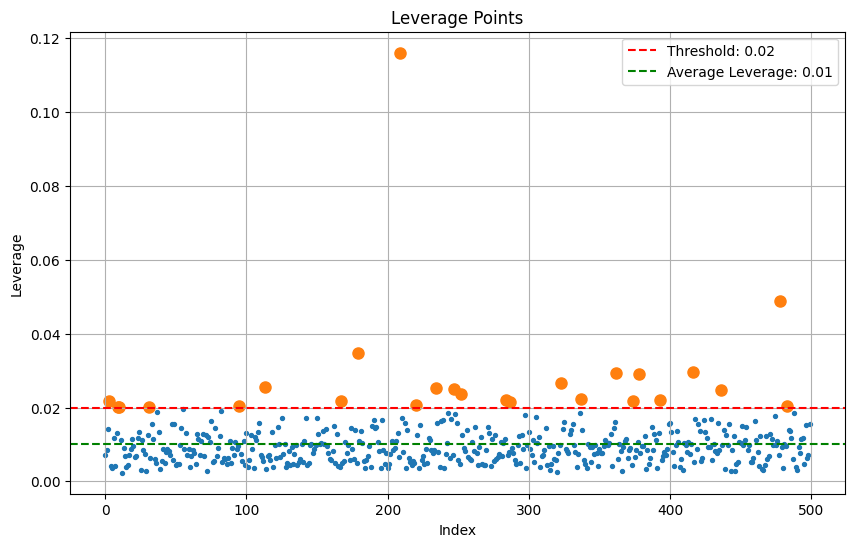

In [13]:
# Plotting leverage points
plt.figure(figsize=(10, 6))
plt.scatter(summary['index'], summary['leverage'], s=8)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.axhline(y=avg_lev, color='g', linestyle='--', label=f'Average Leverage: {avg_lev:.2f}')

hi_idx = summary[summary['leverage'] > threshold].index.tolist()

if len(hi_idx) > 0:
  plt.scatter(hi_idx, summary.loc[hi_idx, "leverage"], s=8*8)

plt.legend()
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage Points')
plt.grid(True)
plt.show()

# **Clase 6-10-25**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [15]:
# Generate synthetic data
np.random.seed(0)

# Normal house
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

# Add few manor
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Fit a LR model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

In [16]:
# Printing model parameters
print("Model with mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")

Model with mansions:
Intercept: -225040.03
Slope: 114.59


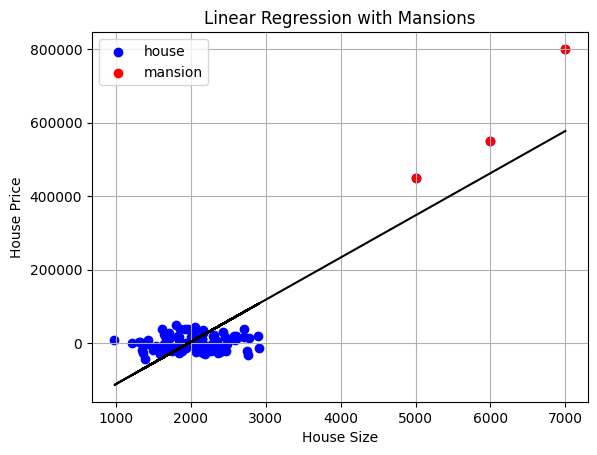

In [17]:
# Plot the data
plt.scatter(house_size, house_price, label="house", color="blue")
plt.scatter(house_size[-3:], house_price[-3:], label="mansion", color="red")

# Plot the regression line
plt.plot(house_size, model.params[0] + model.params[1]*house_size, color='black')
plt.title('Linear Regression with Mansions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend(); plt.grid(True)
plt.show()

In [20]:
# Get the leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Threshold
n = len(house_size)
p = X.shape[1]
avg_lev = p/n
threshold = 2*avg_lev
print(f"{threshold:.4f}")

0.0388


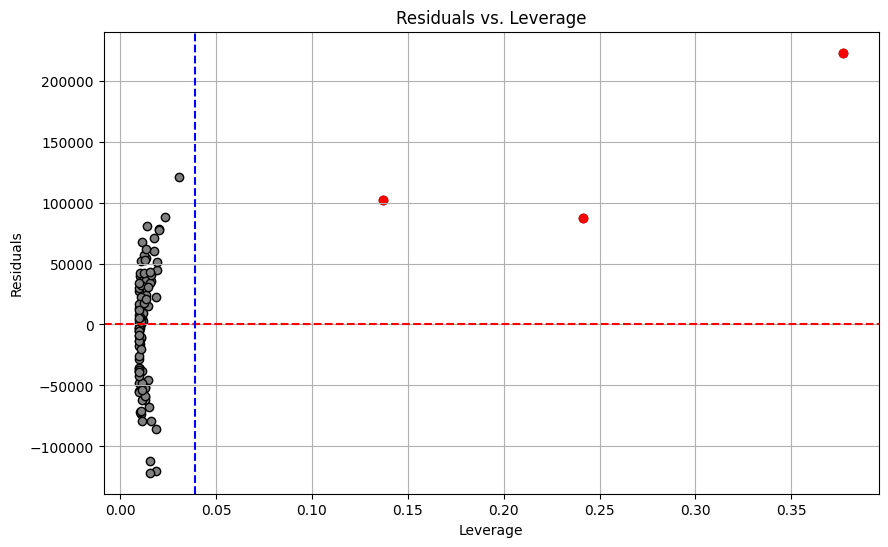

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(leverage, residuals, edgecolors='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='b', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs. Leverage'); plt.grid(True)

high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], color='red', label='High Leverage Points')
plt.show()

In [24]:
print(f"High Leverage points (index): {high_leverage_points}")
print(f"Leverage values: {leverage[high_leverage_points]}")

High Leverage points (index): [100 101 102]
Leverage values: [0.13694378 0.24146323 0.37708716]


# **Boston Housing Dataset**

In [25]:
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import requests

response = requests.get('http://lib.stat.cmu.edu/datasets/boston')
data = response.text
for i, line in enumerate(data.split('\n')):
    if i<24:
        print(f'{i}   {line}' )
    elif i>1020:
        print(f'{i}   {line}' )

columns = []
for i,line in enumerate(data.split('\n')[:-1]):
    if i > 6 and i <21:
        if re.match('^\s*([A-Z]+)',line):
            columns.append(re.match('^\s*([A-Z]+)',line).groups()[0])
columns

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-649520731.py:20: SyntaxWarning: invalid escape sequence '\s'
  if re.match('^\s*([A-Z]+)',line):
/tmp/ipython-input-649520731.py:21: SyntaxWarning: invalid escape sequence '\s'
  columns.append(re.match('^\s*([A-Z]+)',line).groups()[0])


0    The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
1    prices and the demand for clean air', J. Environ. Economics & Management,
2    vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
3    ...', Wiley, 1980.   N.B. Various transformations are used in the table on
4    pages 244-261 of the latter.
5   
6    Variables in order:
7    CRIM     per capita crime rate by town
8    ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
9    INDUS    proportion of non-retail business acres per town
10    CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
11    NOX      nitric oxides concentration (parts per 10 million)
12    RM       average number of rooms per dwelling
13    AGE      proportion of owner-occupied units built prior to 1940
14    DIS      weighted distances to five Boston employment centres
15    RAD      index of accessibility to radial highways
16    TAX      full-value proper

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [26]:
l = {}
for i,line in enumerate(data.split('\n')[:-1]):
    if i>21:
        x = re.findall('[0-9.]+',line)

        if len(x)>3:
            l[i]=x
        else:
            l[i-1].extend(x)
for key in list(l.keys())[:3]:
    print(l[key])

['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00']
['0.02731', '0.00', '7.070', '0', '0.4690', '6.4210', '78.90', '4.9671', '2', '242.0', '17.80', '396.90', '9.14', '21.60']
['0.02729', '0.00', '7.070', '0', '0.4690', '7.1850', '61.10', '4.9671', '2', '242.0', '17.80', '392.83', '4.03', '34.70']


In [27]:
df=pd.DataFrame(columns=columns)
df.columns=columns
for i in l:
    row = l[i]
    df.loc[i,:]=row
df.reset_index(drop=True,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
502,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
503,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
504,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00
